In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [2]:
# Loading the data.

train,test = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Splitting the train into Test Input and True Label.

X_train,y_train = train

In [4]:
# Splitting the test into Test Input and True Label.

X_test,y_test = test

In [5]:
# Normalise the pixel values for the images.

X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# One-hot encode the target labels.

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [7]:
# Creating a CNN for classification of MNIST digits.

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),activation = "relu",input_shape = (28,28,1),padding = "valid"))
model.add(MaxPool2D(pool_size = (2,2),strides = 2))


model.add(Conv2D(32,kernel_size = (3,3),activation = "relu",padding = "valid"))
model.add(MaxPool2D(pool_size = (2,2),strides = 2))

model.add(Flatten())

model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(10,activation = "sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,242 (247.04 KB)

 Trainable params: 63,242 (247.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training the CNN model on train data for 20 epochs and with EarlyStopping callback.

model.compile(optimizer = "adam",loss = "categorical_crossentropy")

earlyStopping = EarlyStopping(patience = 5,restore_best_weights = True)

history = model.fit(X_train,y_train,epochs = 20,callbacks = [earlyStopping],batch_size = 64)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.5327
Epoch 2/20
 62/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0724

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0694
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0468
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0381
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0300
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0226
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0196
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0162
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0139
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0127
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0094
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0092
Epoch 13/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0081
Epoch 14/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0063
Epoch 15/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0076
Epoch 16/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0061

In [10]:
# Evaluating the Loss on test data.

test_loss = model.evaluate(X_test,y_test)

print(f"Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0466
Loss: 0.0369


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


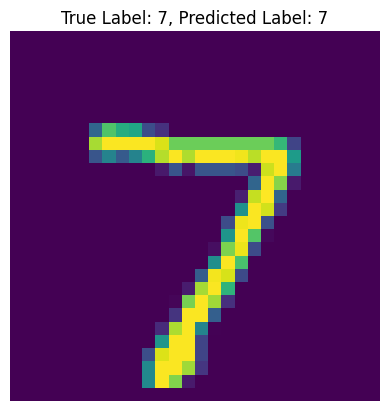

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


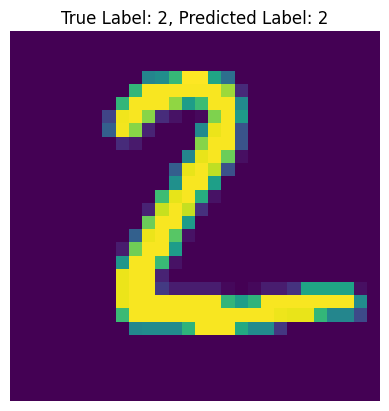

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


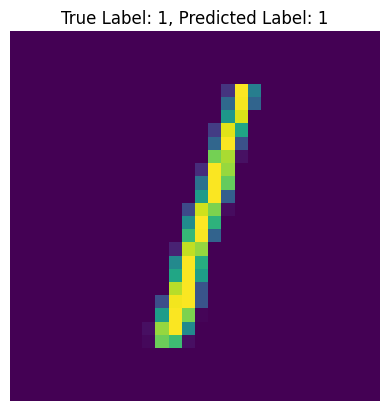

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


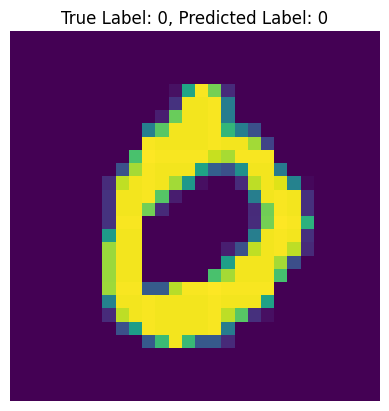

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


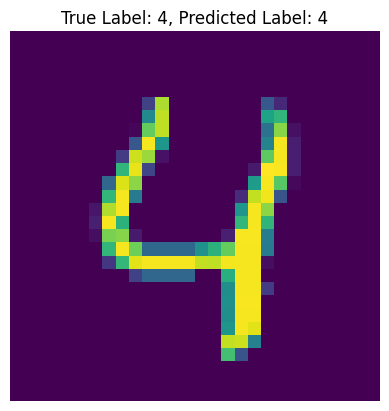

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


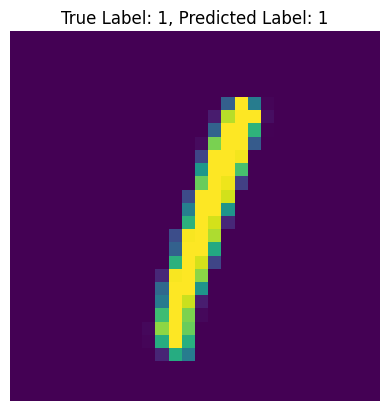

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


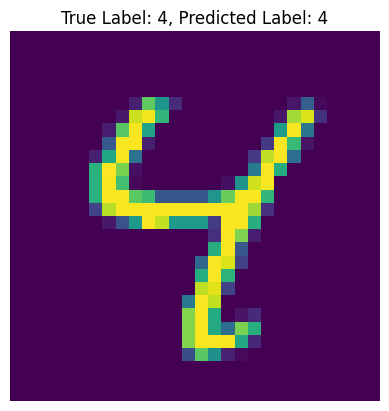

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


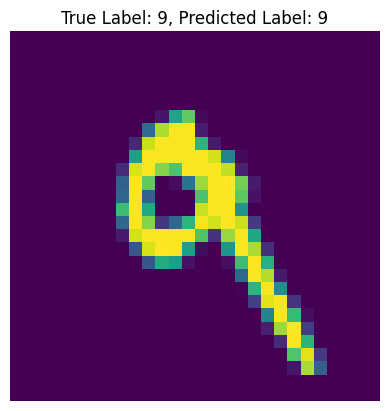

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


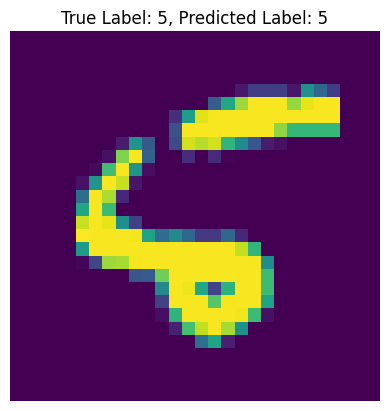

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


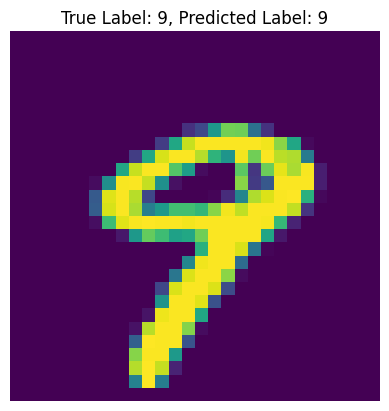

In [18]:
# Checking the predictions for first 10 images in test.

for i in range(10):
  image = X_test[i]
  label = y_test[i]
  predicted = model.predict(image.reshape(1, 28, 28, 1))
  plt.imshow(image)
  plt.title(f"True Label: {np.argmax(label)}, Predicted Label: {np.argmax(predicted)}")
  plt.axis("off")
  plt.show()